# Modules and Packages

One of the reasons Python is so versatile is the broad ecosystem of packages that add more specialized functionality on top of vanilla Python. These include built-in modules like `math` and `os`, third party packages like `numpy` and `xarray`, and modules and packages that you've created yourself. Loosely, a module is a single .py file and a package is a collection of modules (like in the exercise to follow after lunch). In this lecture we'll explain a bit about modules and packages, why you'd want to use them and how to access them.

### Why modules and packages?

Putting all the code for a small project in just one notebook might make sense, but what happens when your project starts getting more complicated? Say I want to do some (very complicated) ceiling division in this notebook:

`3 // 2`  # floor division, result is 1  
`3 ?? 2`  # no equivalent operator for ceiling division, result would be 2

We could define a function to do this ourselves:

In [ ]:
def ceiling_division(x, y):
    if (x / y) % y >= 0.5:
        return x // y + 1
    else:
        return x // y

In [ ]:
ceiling_division(5, 3)

But this function actually already exists in Python's built-in `math` module, so we can make it available using `import`. This saves us having to write out the function above in our notebook/script which makes the end result easier to read, and also means we can import this function in any script/notebook we create.

In [ ]:
import math
math.ceil(5/3)

### Loading Modules: the `import` Statement

To load modules Python uses the `import` statement. When you call [`import`](https://docs.python.org/3/reference/import.html), Python searches through all the places it knows to look for modules and packages (the `PATH` environment variable), runs the module or package you're importing and makes all the functions and classes in the module/package available to you.

In [ ]:
# some ways to import things
import os  # import a module
from os import path  # import a specific function/class from a module (or a module from a package)
import statistics as stats  # import a module and give it a short alias
from statistics import mean, median  # import multiple by seperating with a comma
from statistics import mean as mn  # import a function from a module and give it a short alias

Once you've imported a package/module you can access anything inside it using dot notation. 

In [ ]:
import math  # already imported it earlier but just to be sure
math.cos(math.pi)

#### Exercise 1
Import the built in sys module and use the module's path attribute to see where Python's `import` is searching for modules, functions and classes.

In [1]:
# your code here
import sys

sys.path

['C:\\Users\\tams00\\OneDrive - CEFAS\\git\\pythoncourse2022-materials\\notebooks',
 'C:\\Users\\tams00\\AppData\\Local\\mambaforge\\envs\\course2022\\python38.zip',
 'C:\\Users\\tams00\\AppData\\Local\\mambaforge\\envs\\course2022\\DLLs',
 'C:\\Users\\tams00\\AppData\\Local\\mambaforge\\envs\\course2022\\lib',
 'C:\\Users\\tams00\\AppData\\Local\\mambaforge\\envs\\course2022',
 '',
 'C:\\Users\\tams00\\AppData\\Local\\mambaforge\\envs\\course2022\\lib\\site-packages',
 'C:\\Users\\tams00\\AppData\\Local\\mambaforge\\envs\\course2022\\lib\\site-packages\\win32',
 'C:\\Users\\tams00\\AppData\\Local\\mambaforge\\envs\\course2022\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\tams00\\AppData\\Local\\mambaforge\\envs\\course2022\\lib\\site-packages\\Pythonwin']

There is one other kind of import not mentioned above which is the * import. This imports everything inside a module and lets you access it without having to preface with with the module name. This is normally **very confusing** and should be avoided.  
e.g. 
```python
from math import *
```

This is bad because you don't know where your function has come from, you might overwrite functions accidentally, and it might take a long time if there are a lot of things to import.  
Example:

In [ ]:
help(sum)

We can use this to compute the sum of a sequence, starting with a certain value (here, we'll start with ``-1``):

In [ ]:
sum(range(5), -1)

Now observe what happens if we make the *exact same function call* after importing ``*`` from ``numpy``:

In [ ]:
from numpy import *

In [ ]:
sum(range(5), -1)

The result is off by one!
The reason for this is that the ``import *`` statement *replaces* the built-in ``sum`` function with the ``numpy.sum`` function, which has a different call signature: in the former, we're summing ``range(5)`` starting at ``-1``; in the latter, we're summing ``range(5)`` along the last axis (indicated by ``-1``). The moral is don't use `import *` unless you have a `very good reason`.

## Reusing your own code

If you want to write larger and better organized programs, and define objects (variables, functions, classes) that you want to reuse several times, you have to create your own modules. There are a few reasons why you'd want to start creating your own modules and packages:
#### Readability
Taking function and class definitions out of a 'main' script and storing them somewhere else makes the logic of your 'main' script much easier to follow. If whoever is reading the 'main' script (including you) doesn't need to see the details of how a function works, then it might make sense to put it somewhere else. This is sometimes called abstraction.
#### Maintainability
By seperating the logic of your project out into individual chunks (modules) you can make it easier to maintain.
- If the code related to different parts of your program lives in seperate modules, you know where to look to fix problems with specific functionality
- Each module is seperate from other modules, which forces you to clear up any messy dependencies between parts of the program 

#### Shareability
If you want to give someone else access to the code you've written, you can share a ready to run module or package with them.

```python
# example of a main script that you're pulling other modules into
import currents
import tides
import winds

wind_data = winds.get_wind_data()
tide_data = tides.get_tide_data()
current_data = currents.get_current_data()
```

#### Exercise 2
Let's create a new module called my_module.
```python
# A demo module

def show_me_a():
    """Prints a."""
    print('a')
    
def show_me_b():
    """Prints b."""
    print('b')

CONSTANT = 2

```

To do this we need to create a new file called called my_module.py (a module is just a .py file).  
Create my_module.py in the same folder as this notebook using Jupyter Notebook or a text editor.  
- In Jupyter e.g. !echo # a demo module > my_module.py  
- In Windows e.g. use Notepad to save a new file as 'All files' and my_module.py

Copy the Python above into the file.

Suppose we want to call the `show_me_a` function from the interpreter. We could execute the file as a script, but since we just want to have access to the function `show_me_a`, we import it as a module. The syntax is as follows.

In [1]:
import newmod

#  now we have access to everything inside the demo module!

newmod.show_me_a()

newmod.CONSTANT

a


2

In [4]:
dir(newmod)

['CONSTANT',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'show_me_a',
 'show_me_b']

In [1]:
import newmod
#dir(plt)

2


In [2]:
dir(plt)

NameError: name 'plt' is not defined

## Importing from Python's Standard Library

Python's standard library contains many useful built-in modules. To name but a few:

- ``argparse``: Parser for command-line options, arguments and sub-commands
- ``random``: generating pseudorandom numbers
- ``json`` and ``csv``: reading/writing JSON-formatted and CSV-formatted files.
- ``os`` and ``sys``: interfacing with the operating system
- ``math`` and ``cmath``: mathematical operations on real and complex numbers
- ``itertools``: constructing and interacting with iterators and generators
- ``pickle``: object persistence: saving objects to and loading objects from disk

More: https://docs.python.org/3/library/.

## Installing Third-Party Packages

### PyPI - The Python Package Index

* Often, when you want to code something, there is already a package that does it, so no need to reinvent the wheel!
* There are >90,000 packages out there!
* Various scientific libraries can be imported just as the built-in modules, but first the modules must be installed on your system.
* The standard registry for such modules is the Python Package Index (*PyPI* for short):  http://pypi.python.org/.
* For convenience, Python comes with a program called ``pip`` (a recursive acronym meaning "pip installs packages"), which will automatically fetch packages released and listed on PyPI.

For example, if you'd like to install a nice package to work with physical units, [``pint``](https://pint.readthedocs.io/en/0.7.2/), all that is required is to type the following at the command line:
```
$ pip install pint
```
The source code for the package will be automatically downloaded from the PyPI repository, and the package installed in the standard Python path.

### Virtual environments

Using pip to install packages in your standard Python path can become very messy if you need lots of different packages (as scientific Python often does). Virtual environments were developed to avoid this issue. You set up a virtual environment that you put whatever packages you want into, which is seperate from your base python and any other virtual environments you need. There are a few ways of doing this. 

#### venv
This is a basic way of creating virtual environments that comes with Python. If you need something lightweight or can't install anything other than Python [try it](https://packaging.python.org/en/latest/tutorials/installing-packages/#creating-and-using-virtual-environments). Otherwise we recomment one of the options below.  


#### Anaconda & conda

> Anaconda is the leading open data science platform powered by Python. The open source version of Anaconda is a high performance distribution of Python and R and includes over 100 of the most popular Python, R and Scala packages for data science.

> Additionally, you'll have access to over 720 packages that can easily be installed with conda, our renowned package, dependency and environment manager, that is included in Anaconda. 

conda is like venv in that it can create virtual environments, but it is also a package manager like pip. You can use conda to create environments *and* install packages in them. It's pretty good at finding ways of sticking all the packages you need in an environment, if a little slow about it. Anaconda is a [data science platform](https://www.anaconda.com/) that includes a Python distribution, uses conda, comes with loads of Python packages/R support and a nice graphical user interface that's easy to navigate for new starters. It is relatively huge and corporate but look how much fun the stock person in this article on their website is having.

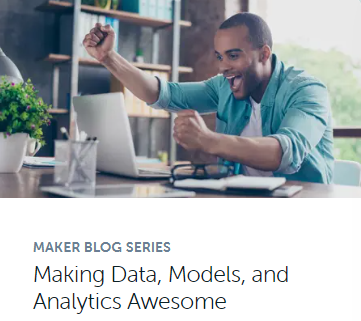

In [3]:
from IPython.core.display import Image
Image('https://i.imgur.com/M5ulbx2.png')

#### Mamba
[Mamba](https://github.com/mamba-org/mamba) is a package/environment manager that works a lot like conda but faster. It's still relatively young but is quickly becoming a [FLOSS](https://en.wiktionary.org/wiki/foss) alternative to Anaconda+conda.

# An anaconda example
To make use of the excellent [interpolation tools](https://unidata.github.io/MetPy/latest/examples/gridding/Point_Interpolation.html?highlight=barnes) from the [``MetPy``](https://unidata.github.io/MetPy/latest/) meteorological library takes threee steps:
1. Install the package on your system
```
$ conda install -c conda-forge metpy 
```
2. Import the desired fucntion from the metpy pacakge to your workspace
```ipython
from metpy.interpolate import interpolate_to_grid
```
3. Use the function on your data
```ipython
x_grid,y_grid,temp_grid = interpolate_to_grid(x,y,temp,interp_type='barnes',search_radius=8)
```

## References
* *A Whirlwind Tour of Python* by Jake VanderPlas (O’Reilly). Copyright 2016 O’Reilly Media, Inc., 978-1-491-96465-1
* [Conda: Myths and Misconceptions](https://jakevdp.github.io/blog/2016/08/25/conda-myths-and-misconceptions/)